StatLib的加州房产价格数据集的价格预测线性回归模型

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### 载入数据

In [3]:
data = pd.read_csv('./datasets/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# total_bedrooms有207个缺失值
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

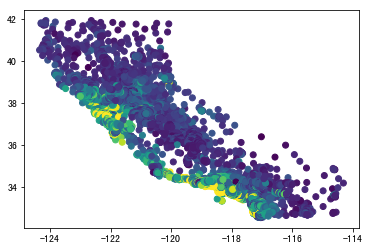

In [7]:
plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'])

In [9]:
data.describe([0.1, 0.9])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
10%,-122.290000,33.630000,13.000000,941.000000,198.000000,510.000000,184.000000,1.903800,82300.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
90%,-117.250000,38.480000,46.000000,4651.500000,965.000000,2566.000000,890.000000,6.159210,376600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
 data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
# 分类变量的离散化
data_ocean_encoded = pd.get_dummies(data['ocean_proximity'])
df = pd.concat([data, data_ocean_encoded], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


#### baseline模型

In [40]:
df2 = df.copy()

In [41]:
df2.drop(columns=['ocean_proximity'], inplace=True)   # 删除非数字信息
df2.dropna(axis=0, inplace=True)   # 删除丢失信息
df2.shape

(20433, 14)

In [29]:
scaler = StandardScaler()
df2[['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms','population','households', 'median_income']] = scaler.fit_transform(df2[['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms','population','households', 'median_income']])

In [42]:
train_X,test_X, train_y, test_y = train_test_split(df2.drop(columns=['median_house_value']), df2[['median_house_value']], test_size=0.3, random_state=80)

In [43]:
train_X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9236,-119.95,36.96,18.0,1996.0,379.0,1327.0,356.0,2.6087,0,1,0,0,0
17966,-121.98,37.31,32.0,2248.0,460.0,1191.0,419.0,5.6060,1,0,0,0,0
7446,-118.16,33.93,35.0,757.0,151.0,474.0,132.0,3.7361,1,0,0,0,0
5995,-117.73,34.09,30.0,2345.0,496.0,1897.0,454.0,2.4375,0,1,0,0,0
2127,-119.73,36.80,15.0,2376.0,538.0,1197.0,510.0,3.1417,0,1,0,0,0


In [44]:
estimator1 = LinearRegression()
estimator1.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
print("训练集的RMSE为{}".format(np.sqrt(mean_squared_error(train_y, estimator1.predict(train_X)))))
print("测试集的RMSE为{}".format(np.sqrt(mean_squared_error(test_y, estimator1.predict(test_X)))))

训练集的RMSE为68223.55311608227
测试集的RMSE为69629.4426855204


#### 数据探索

深入的数据开展分析，揭示其中的相关性和特点

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2fa9ea20>,
      dtype=object)

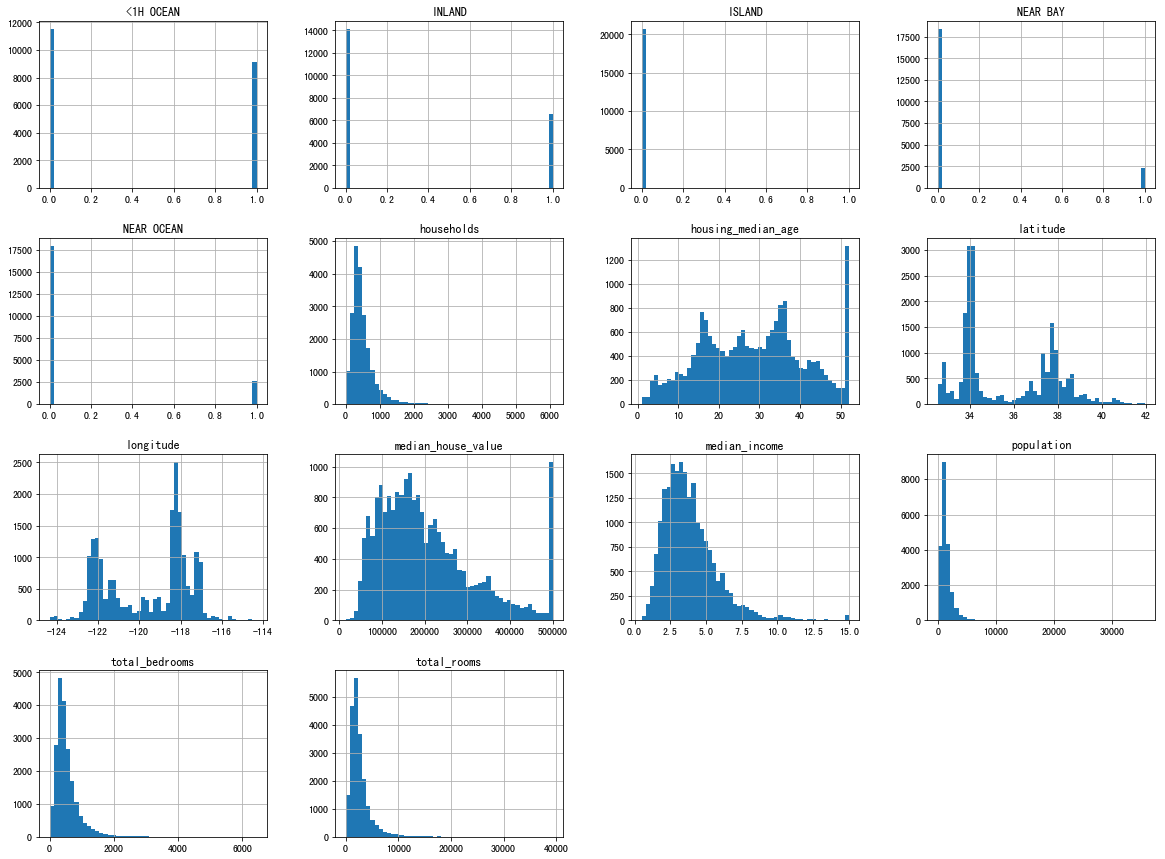

In [53]:
# 各特征的分布直方图
df.hist(bins=50, figsize=(20, 15))

观察数据分布情况，可能存在如下问题：<br>
1. 两端数据量激增，是否存在截断处理？ <br>
2. 单位是否存在问题？<br>
3. 偏态数据可能需要进行log、box-cox等处理，使其更正态